# Initial Setups

## autoreload

In [1]:
%load_ext autoreload
%autoreload 2

## dir setup

In [2]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
interim_data_dir = os.path.join(project_dir, os.environ.get("INTERIM_DATA_DIR"))
wordvecs_data_dir = os.path.join(project_dir, os.environ.get("WORDVECS_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))
models_dir = os.path.join(project_dir, os.environ.get("MODELS_DIR"))

## imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# import sweetviz as sv
# import utils

In [5]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', None)

In [6]:
from tqdm import tqdm
tqdm.pandas()

/Users/hitoshinagano/.virtualenvs/tensorflow2/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## project imports

In [7]:
import sys
sys.path.insert(0, '..')

from src.features import *
from src.models import *

### reading item_domain

In [8]:
item_domain_fn = 'item_domain.pkl'
item_domain_fp = os.path.join(processed_data_dir, item_domain_fn)
item_domain = pd.read_pickle(item_domain_fp)

In [9]:
item_domain

,item_id,domain_id,category_id
0,111260,MLM-INDIVIDUAL_HOUSES_FOR_SALE,MLM170527
1,871377,MLM-VIDEO_GAMES,MLM151595
2,490232,MLM-SKIRTS,MLM7697
3,1150706,MLM-GRAPHICS_CARDS,MLM9761
4,934912,MLM-NOTEBOOKS,MLM1652
...,...,...,...
2102272,1099649,MLB-BABY_STROLLERS,MLB1386
2102273,1482187,MLB-KITCHEN_SUPPLIES,MLB193425
2102274,1118904,MLB-SOCKS,MLB108791
2102275,237229,MLB-DISPOSABLE_BABY_DIAPERS,MLB40629


## test_dataset.jl.gz

In [10]:
# %%time
# test = read_raw_save_processed('test_dataset.jl.gz', 'test_dataset.pkl')

### submissions check

In [11]:
pred_fn = 'pred_12_interim.pkl'
pred_fp = os.path.join(interim_data_dir, pred_fn)
pred = pd.read_pickle(pred_fp)

pred.columns = [str(c) for c in pred.columns]

In [12]:
for c in range(10):
    pred[str(c) + '_domain'] = pd.merge(pred, item_domain, how = 'left', left_on = str(c), right_on = 'item_id')['domain_id']
    pred[str(c) + '_MLX'] = pred[str(c) + '_domain'].str[:3]

In [13]:
pred_domains = pred.filter(like = 'MLX').replace({'MLB': 1, 'MLM': 0})

In [14]:
pred = pd.concat([pred, pred_domains.sum(axis = 1)], axis = 1)

In [15]:
pred[pred[0].isin(range(1, 10))].sample(10)

,0,1,2,3,4,5,6,7,8,9,top_score,origin,0_domain,0_MLX,1_domain,1_MLX,2_domain,2_MLX,3_domain,3_MLX,4_domain,4_MLX,5_domain,5_MLX,6_domain,6_MLX,7_domain,7_MLX,8_domain,8_MLX,9_domain,9_MLX,0
63483,404618.0,695291.0,1501452.0,1769938.0,1880301.0,108248.0,1452840.0,915856.0,1910366.0,649372.0,0.932744,pt,MLB-VEHICLE_ACCESSORIES,MLB,MLB-T_SHIRTS,MLB,MLB-LAPTOP_BATTERIES,MLB,MLB-ROUTERS,MLB,MLB-TV_ANTENNAS,MLB,None,None,MLB-PERFUMES,MLB,MLB-T_SHIRTS,MLB,MLB-T_SHIRTS,MLB,MLB-T_SHIRTS,MLB,9.0
128758,1417874.0,1773309.0,2037087.0,1256988.0,122186.0,372301.0,1280093.0,435838.0,1767506.0,391869.0,0.002873,pt,MLB-HEADPHONES,MLB,MLB-HEADPHONES,MLB,MLB-HEADPHONES,MLB,MLB-AUTOMOTIVE_HEADLIGHTS,MLB,MLB-CELLPHONES,MLB,MLB-HEADPHONES,MLB,MLB-HEADPHONES,MLB,MLB-VEHICLE_BATTERY_CHARGERS,MLB,MLM-INDUSTRIAL_AND_COMMERCIAL_EQUIPMENT,MLM,MLB-HOME_APPLIANCES_ACCESSORIES_AND_SPARE_PARTS,MLB,9.0
140554,247636.0,1742041.0,1894645.0,285620.0,729855.0,1502323.0,1089005.0,162430.0,222926.0,1620467.0,0.538928,pt,MLB-SNEAKERS,MLB,MLB-SNEAKERS,MLB,MLB-SNEAKERS,MLB,MLB-FERTILE_BIRD_EGGS,MLB,MLB-SNEAKERS,MLB,MLB-SNEAKERS,MLB,MLB-SNEAKERS,MLB,MLB-SNEAKERS,MLB,None,None,MLB-SNEAKERS,MLB,9.0
61652,306758.0,1207157.0,716822.0,418070.0,1203256.0,1613106.0,848819.0,38837.0,1019093.0,718391.0,0.022342,pt,MLB-CELLPHONES,MLB,MLB-AIR_COMPRESSORS,MLB,MLM-HEADPHONES,MLM,MLB-BLOOD_PRESSURE_MONITORS,MLB,MLB-CELLPHONES,MLB,MLB-HOT_FOOD_DISPLAY_CASES,MLB,MLB-SMARTWATCHES,MLB,MLB-LOAFERS_AND_OXFORDS,MLB,MLB-SNEAKERS,MLB,MLB-SNEAKERS,MLB,9.0
169628,351611.0,525875.0,1698824.0,1100242.0,1311504.0,336212.0,2022632.0,1748431.0,183316.0,743301.0,0.262276,pt,MLB-CARS_AND_VANS,MLB,MLB-PANTS,MLB,MLB-CELLPHONES,MLB,MLB-SANDALS_AND_FLIP_FLOPS,MLB,MLB-MUSICAL_INSTRUMENT_ACCESSORIES,MLB,MLB-CELLPHONES,MLB,MLB-PORTABLE_CELLPHONE_CHARGERS,MLB,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-SNEAKERS,MLB,MLB-FACIAL_SKIN_CARE_PRODUCTS,MLB,9.0
3789,1756392.0,225526.0,1234912.0,869038.0,1539514.0,1207330.0,184416.0,90066.0,270192.0,1747681.0,0.411251,pt,None,None,MLB-PLANTING_KITS,MLB,MLB-CAT_AND_DOG_DRINKERS_AND_FEEDERS,MLB,MLB-CAT_AND_DOG_DRINKERS_AND_FEEDERS,MLB,MLB-CAT_AND_DOG_DRINKERS_AND_FEEDERS,MLB,MLB-DISHES_RACKS,MLB,MLB-GAME_CONSOLES,MLB,MLB-VIDEO_GAMES,MLB,MLB-SURVEILLANCE_CAMERAS,MLB,MLB-GAME_CONSOLES_VIDEO_GAMES_AND_ARCADE_MACHINES,MLB,9.0
40568,863486.0,1875533.0,1465772.0,912503.0,149390.0,1730990.0,1350228.0,1748431.0,2032798.0,777316.0,0.556866,pt,MLB-FOOTBALL_SHIRTS,MLB,MLB-HAIR_CLIPPERS,MLB,MLB-CELLPHONES,MLB,MLB-BRAS,MLB,MLB-JACKETS_AND_COATS,MLB,MLB-HEADPHONES,MLB,MLB-KEY_RACKS,MLB,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-HEADPHONES,MLB,MLB-SNEAKERS,MLB,9.0
73966,553704.0,960818.0,2060996.0,870429.0,1916890.0,214827.0,423507.0,297534.0,1796243.0,1832367.0,0.003893,pt,MLB-CELLPHONE_BATTERIES,MLB,MLB-CELLPHONE_BATTERIES,MLB,MLB-CELLPHONE_BATTERIES,MLB,MLB-CONTINUOUS_LIGHTING,MLB,MLB-CONTINUOUS_LIGHTING,MLB,MLB-SOFA_AND_FUTON_COVERS,MLB,MLB-CONTINUOUS_LIGHTING,MLB,MLB-CARS_AND_VANS_COVERS,MLB,MLM-DOOR_AND_WINDOW_AWNINGS_AND_EAVES,MLM,MLB-CONTINUOUS_LIGHTING,MLB,9.0
106215,831247.0,1436844.0,609444.0,1680683.0,1392118.0,1569487.0,433106.0,2067185.0,1597263.0,775367.0,0.021030,pt,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-CELLPHONES,MLB,MLB-NAIL_AND_CUTICLE_CUTTERS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-CELLPHONES,MLB,MLB-BOOTS_AND_BOOTIES,MLB,MLB-GAME_CONSOLES,MLB,MLM-VEHICLE_MULTIMEDIA_SYSTEMS,MLM,MLB-SMARTWATCHES,MLB,MLB-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,MLB,9.0
100057,1837891.0,288820.0,534830.0,1678137.0,1703796.0,1158088.0,659334.0,797984.0,1175748.0,1224419.0,0.027106,pt,MLB-ANIMAL_AND_PET_PRODUCTS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-ANIMAL_AND_PET_PRODUCTS,MLB,MLB-CELLPHONES,MLB,MLB-SPEAKERS,MLB,MLB-VEHICLE_CARBURETOR_ACCELERATOR_CABLES,MLB,MLB-ANIMAL_AND_PET_PRODUCTS,MLB,MLB-VIDEO_GAME_PREPAID_CARDS,MLB,MLM-CELLPHONE_SCREENS,MLM,MLB-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,MLB,9.0


In [16]:
pred.rename(columns = {0: 'MLX_sum'}, inplace = True)

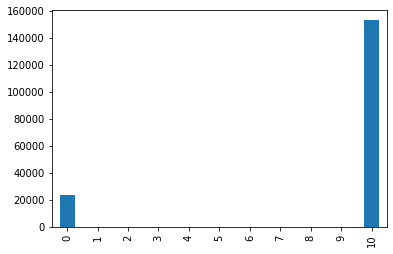

In [17]:
pred.MLX_sum.value_counts().reindex(range(11)).plot(kind = 'bar', logy = False);

In [18]:
pred_domains = pred.filter(like = 'domain')

In [19]:
pred_domains = pred_domains.fillna('NONE')

In [20]:
pred['unique_domains'] = pred_domains.apply(lambda x: np.unique(x, return_counts = True), axis = 1)

In [21]:
pred['len_unique_domains'] = pred.unique_domains.str[0].str.len()

In [22]:
pred['len_domain_mode_freq'] = pred.unique_domains.str[1].apply(max)

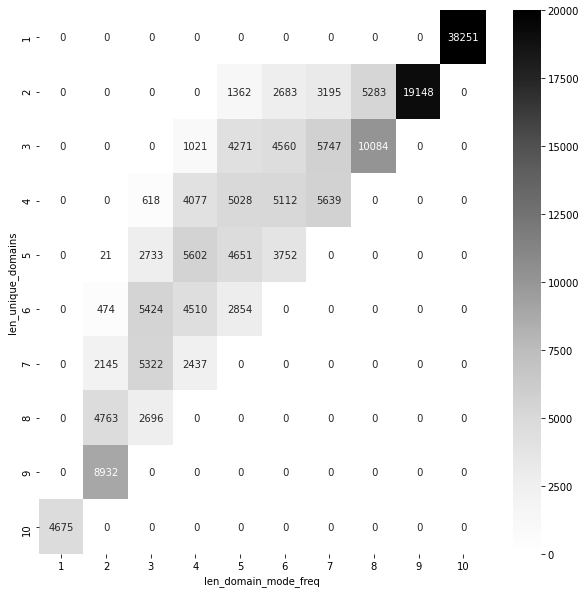

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(index = pred.len_unique_domains, columns = pred.len_domain_mode_freq), cmap = 'Greys', vmax = 20000, annot = True, fmt = '2');